In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import stats

In [ ]:
# AQUISIÇÃO DE DADOS

#Ler o conteúdo do dataset
df = pd.read_csv("./dataset.csv")

In [4]:
#Visualize as 15 primeiras linhas
print("As primeiras 15 linhas do dataset:")
print(df.head(15))

As primeiras 15 linhas do dataset:
       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   

In [5]:
#Obtenha a dimensão do dataframe
print("Dimensões do dataframe (linhas, colunas):")
print(df.shape)

Dimensões do dataframe (linhas, colunas):
(5110, 12)


In [6]:
#Remova a primeira linha do dataframe se esta contiver os headers
df.columns = df.iloc[0]  
df.drop(0, inplace=True) 
print(df.head(15))

0    9046    Male  67.0  0  1  Yes        Private  Urban  228.69  36.6  \
1   51676  Female  61.0  0  0  Yes  Self-employed  Rural  202.21   NaN   
2   31112    Male  80.0  0  1  Yes        Private  Rural  105.92  32.5   
3   60182  Female  49.0  0  0  Yes        Private  Urban  171.23  34.4   
4    1665  Female  79.0  1  0  Yes  Self-employed  Rural  174.12  24.0   
5   56669    Male  81.0  0  0  Yes        Private  Urban  186.21  29.0   
6   53882    Male  74.0  1  1  Yes        Private  Rural   70.09  27.4   
7   10434  Female  69.0  0  0   No        Private  Urban   94.39  22.8   
8   27419  Female  59.0  0  0  Yes        Private  Rural   76.15   NaN   
9   60491  Female  78.0  0  0  Yes        Private  Urban   58.57  24.2   
10  12109  Female  81.0  1  0  Yes        Private  Rural   80.43  29.7   
11  12095  Female  61.0  0  1  Yes       Govt_job  Rural  120.46  36.8   
12  12175  Female  54.0  0  0  Yes        Private  Urban  104.51  27.3   
13   8213    Male  78.0  0  1  Yes    

In [7]:
#Adicione os mesmos headers que retirou anteriormente ao dataframe
headers = ["id", "gender", "age", "hypertension", "heart_disease", "ever_married","work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke"]
df.columns = headers
print(df.head(3))

      id  gender   age  hypertension  heart_disease ever_married  \
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi smoking_status  \
1  Self-employed          Rural             202.21   NaN   never smoked   
2        Private          Rural             105.92  32.5   never smoked   
3        Private          Urban             171.23  34.4         smokes   

   stroke  
1       1  
2       1  
3       1  


In [8]:
#Apresente o nome das colunas
print("Nome das colunas:")
print(df.columns)

Nome das colunas:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [9]:
#Renomeie uma das colunas (à escolha) para um nome mais sugestivo
df.rename(columns={'age': 'idade'}, inplace=True)
print("Coluna renomeada:")
print(df.columns)

Coluna renomeada:
Index(['id', 'gender', 'idade', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')


In [10]:

#Renomeia a primeira coluna para "Indice" (caso esta coluna se trate de um índice)
df.index.name = 'Indice'
print(df.head())

           id  gender  idade  hypertension  heart_disease ever_married  \
Indice                                                                   
1       51676  Female   61.0             0              0          Yes   
2       31112    Male   80.0             0              1          Yes   
3       60182  Female   49.0             0              0          Yes   
4        1665  Female   79.0             1              0          Yes   
5       56669    Male   81.0             0              0          Yes   

            work_type Residence_type  avg_glucose_level   bmi  \
Indice                                                          
1       Self-employed          Rural             202.21   NaN   
2             Private          Rural             105.92  32.5   
3             Private          Urban             171.23  34.4   
4       Self-employed          Rural             174.12  24.0   
5             Private          Urban             186.21  29.0   

         smoking_status  

In [11]:
# ESTATÍSTICA DESCRITIVA
#Obtenha um sumário da estatística descritiva para cada coluna (média, desvio padrão, quartis), incluindo as colunas do tipo "object"
print("Sumário estatístico de todas as colunas:")
print(df.describe(include="all"))

Sumário estatístico de todas as colunas:
                  id  gender        idade  hypertension  heart_disease  \
count    5109.000000    5109  5109.000000   5109.000000    5109.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36523.206498     NaN    43.221961      0.097475       0.053827   
std     21160.301376     NaN    22.612413      0.296633       0.225697   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17745.000000     NaN    25.000000      0.000000       0.000000   
50%     36942.000000     NaN    45.000000      0.000000       0.000000   
75%     54695.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level       

In [12]:
#Obtenha um sumário da estatística descritiva somente para variáveis categóricas
print("Sumário estatístico para variáveis categóricas:")
print(df.describe(include=['object']))

Sumário estatístico para variáveis categóricas:
        gender ever_married work_type Residence_type smoking_status
count     5109         5109      5109           5109           5109
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3352      2924           2595           1892


In [13]:
#Obtenha um sumário da estatística descritiva somente para uma coluna (à escolha), respeitante a uma variável de escala
print("Sumário estatístico para a coluna:")
print(df[['idade', 'bmi']].describe())

Sumário estatístico para a coluna:
             idade          bmi
count  5109.000000  4908.000000
mean     43.221961    28.891667
std      22.612413     7.854096
min       0.080000    10.300000
25%      25.000000    23.500000
50%      45.000000    28.050000
75%      61.000000    33.100000
max      82.000000    97.600000


In [14]:
#Obtenha os valores máximos e mínimos da coluna anterior
print("Máximo:")
print(df['idade'].max())
print("Mínimo:")
print(df['idade'].min())

Máximo:
82.0
Mínimo:
0.08


In [15]:
#Apresente a frequência de cada um dos valores possíveis de uma coluna (à escolha), respeitante a uma variável categórica
print(df['work_type'].value_counts() )

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [16]:
#Crie uma dataframe contendo cada um dos valores possíveis da coluna da alínea anterior
print(df['work_type'].value_counts().to_frame())

               count
work_type           
Private         2924
Self-employed    819
children         687
Govt_job         657
Never_worked      22


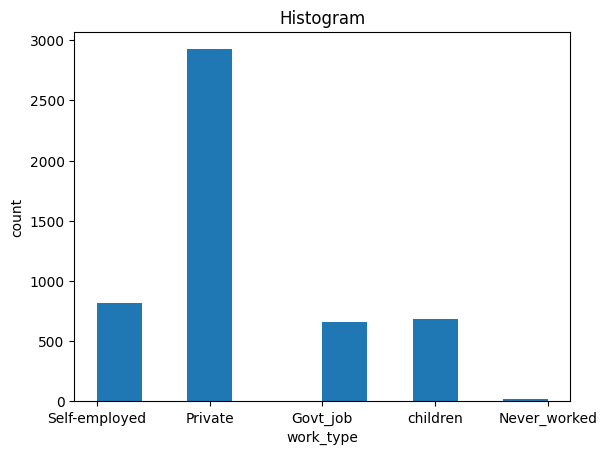

In [17]:
#Apresente graficamente o histograma de uma coluna à escolha
plt.hist(df["work_type"]) 
plt.xlabel("work_type") 
plt.ylabel("count") 
plt.title("Histogram")  
plt.show()

In [18]:
#Apresente as categorias existentes numa coluna (à escolha), respeitante a uma variável categórica
print(df['smoking_status'].unique())

['never smoked' 'smokes' 'formerly smoked' 'Unknown']


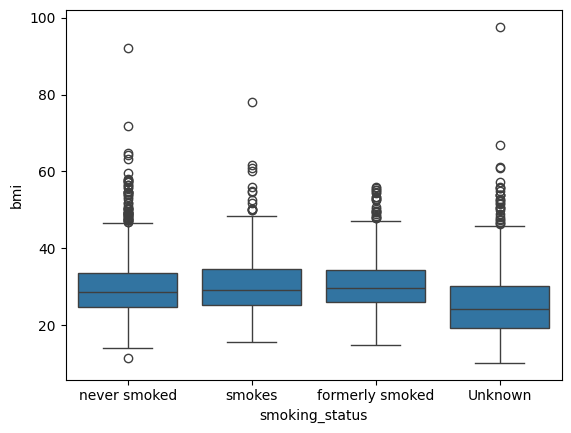

In [19]:
#Apresente em caixa de bigodes (boxplot) a relação entre duas colunas (à escolha), uma respeitante a uma variável categórica, e outra respeitante a uma variável de escala
sns.boxplot(x='smoking_status', y='bmi', data=df)
plt.show()

In [20]:
#Missing Values
#Substitua numa coluna (à escolha) respeitante a uma variável de escala, um determinado valor (à escolha) por NaN
df['idade'] = df['idade'].replace(80, np.nan)
print(df['idade'].head().to_frame())

        idade
Indice       
1        61.0
2         NaN
3        49.0
4        79.0
5        81.0


In [21]:
#Obtenha o número de "missing values" presentes na coluna em causa
print("Contagem de valores em falta por coluna:")
missing_data=df.isnull()  
print (missing_data['bmi'].value_counts())

Contagem de valores em falta por coluna:
bmi
False    4908
True      201
Name: count, dtype: int64


In [22]:
#Substitua os “missing values” presentes na coluna em causa, pela média da mesma
avg_norm_loss = df['bmi'].astype("float").mean(axis=0)
df['bmi'] = df['bmi'].replace(np.nan, avg_norm_loss)
print(df['bmi'].head(20).to_frame())

              bmi
Indice           
1       28.891667
2       32.500000
3       34.400000
4       24.000000
5       29.000000
6       27.400000
7       22.800000
8       28.891667
9       24.200000
10      29.700000
11      36.800000
12      27.300000
13      28.891667
14      28.200000
15      30.900000
16      37.500000
17      25.800000
18      37.800000
19      28.891667
20      22.400000


In [23]:
#Elimine os “missing values” da coluna em causa
df.dropna(subset=["bmi"], axis=0, inplace=True) 
df.reset_index(drop=True, inplace=True) 
print(df['bmi'].head(20).to_frame())

          bmi
0   28.891667
1   32.500000
2   34.400000
3   24.000000
4   29.000000
5   27.400000
6   22.800000
7   28.891667
8   24.200000
9   29.700000
10  36.800000
11  27.300000
12  28.891667
13  28.200000
14  30.900000
15  37.500000
16  25.800000
17  37.800000
18  28.891667
19  22.400000


In [24]:
#Normalização
#Obtenha o tipo de dados de cada coluna
df.dtypes, df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   idade              5039 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


(id                     int64
 gender                object
 idade                float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object,
 None)

In [25]:
#Converta, se necessário, os tipos das colunas para o formato adequado
df[["hypertension", "stroke"]] = df[["hypertension", "stroke"]].astype("float64")
df.dtypes, df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   idade              5039 non-null   float64
 3   hypertension       5109 non-null   float64
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 479.1+ KB


(id                     int64
 gender                object
 idade                float64
 hypertension         float64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke               float64
 dtype: object,
 None)

In [26]:
#Normalize uma coluna (à escolha), respeitante a uma variável de escala, através da criação de uma nova coluna que resulte da primeira, mas cujos valores variem entre 0 e 1
df['age_r'] = df['idade']/df['idade'].max()
print(df[['idade','age_r']].head())

   idade     age_r
0   61.0  0.743902
1    NaN       NaN
2   49.0  0.597561
3   79.0  0.963415
4   81.0  0.987805


In [27]:
#Binning
#Crie uma nova coluna que resulte da divisão de uma coluna (à escolha), respeitante a uma variável de escala, em três categorias "Baixa", "Media", "Elevada".  Os pontos de corte são à escolha
bins = np.linspace(min(df["bmi"]), max(df["bmi"]), 4) 
group_names = ['Baixo', 'Médio', 'Elevado'] 
df['bmi_r'] = pd.cut(df['bmi'], bins, labels=group_names, include_lowest=True)  
print(df[['bmi','bmi_r']].tail())

            bmi  bmi_r
5104  28.891667  Baixo
5105  40.000000  Médio
5106  30.600000  Baixo
5107  25.600000  Baixo
5108  26.200000  Baixo


In [28]:
#Compare a nova coluna com aquela que lhe deu origem mostrando simultaneamente as primeiras 5 linhas de cada uma
print(df[['bmi','bmi_r']].head(5))  

         bmi  bmi_r
0  28.891667  Baixo
1  32.500000  Baixo
2  34.400000  Baixo
3  24.000000  Baixo
4  29.000000  Baixo


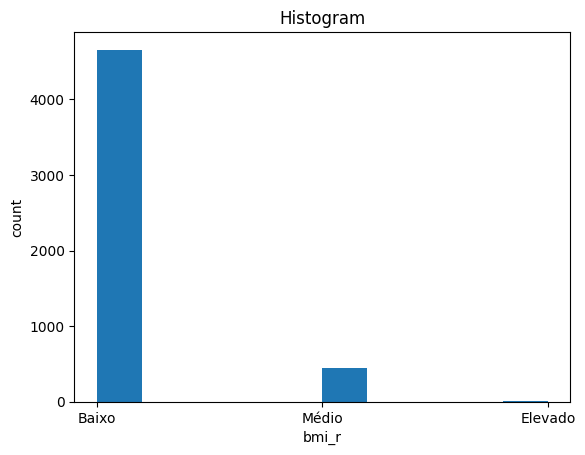

In [29]:
#Apresente graficamente o histograma da nova coluna
df = df.dropna(subset=['bmi_r'])
plt.hist(df['bmi_r'])  
plt.xlabel('bmi_r')  
plt.ylabel('count')  
plt.title('Histogram') 
plt.show()

In [30]:
#Estatística Inferencial 
#Obtenha o coeficiente de correlação entre as diferentes colunas (features) numéricas do dataset
df = df.dropna()
df = df.select_dtypes(include=['float64', 'int64'])
print(df.corr())  

                         id     idade  hypertension  heart_disease  \
id                 1.000000  0.000792      0.002792      -0.006621   
idade              0.000792  1.000000      0.271373       0.256829   
hypertension       0.002792  0.271373      1.000000       0.109424   
heart_disease     -0.006621  0.256829      0.109424       1.000000   
avg_glucose_level  0.003305  0.238387      0.174318       0.165338   
bmi                0.004705  0.333162      0.163534       0.039558   
stroke             0.001933  0.236582      0.120360       0.125592   
age_r              0.000792  1.000000      0.271373       0.256829   

                   avg_glucose_level       bmi    stroke     age_r  
id                          0.003305  0.004705  0.001933  0.000792  
idade                       0.238387  0.333162  0.236582  1.000000  
hypertension                0.174318  0.163534  0.120360  0.271373  
heart_disease               0.165338  0.039558  0.125592  0.256829  
avg_glucose_level       

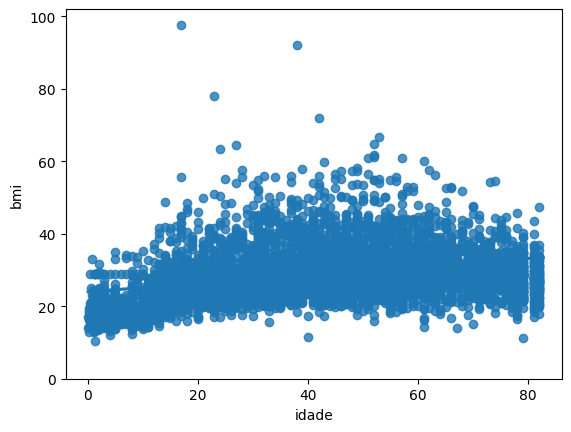

In [31]:
#Para as duas “features” mais fortemente correlacionadas produza o respetivo scatterplot
sns.regplot(x="idade", y="bmi", data=df)  
plt.ylim(0,)  
plt.show()

In [ ]:
#Ler o conteúdo do dataset
df = pd.read_csv("./dataset.csv")

In [33]:
#Apresente uma "pivot table" considerando uma coluna (à escolha), respeitante a uma variável de escala, em função de duas colunas (à escolha), ambas respeitantes a variáveis categóricas
df_new = df[['bmi', 'gender', 'hypertension']]
grouped = df_new.groupby(['bmi', 'gender'], as_index=False).mean()
grouped_pivot = grouped.pivot(index='bmi', columns='gender', values='hypertension')
print(grouped_pivot)

gender  Female  Male  Other
bmi                        
10.3       0.0   NaN    NaN
11.3       0.0   NaN    NaN
11.5       NaN   0.0    NaN
12.0       0.0   NaN    NaN
12.3       0.0   NaN    NaN
...        ...   ...    ...
66.8       0.0   NaN    NaN
71.9       NaN   0.0    NaN
78.0       1.0   NaN    NaN
92.0       NaN   1.0    NaN
97.6       NaN   1.0    NaN

[418 rows x 3 columns]


C:\Users\guigo\AppData\Local\Temp\ipykernel_5944\1116163207.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


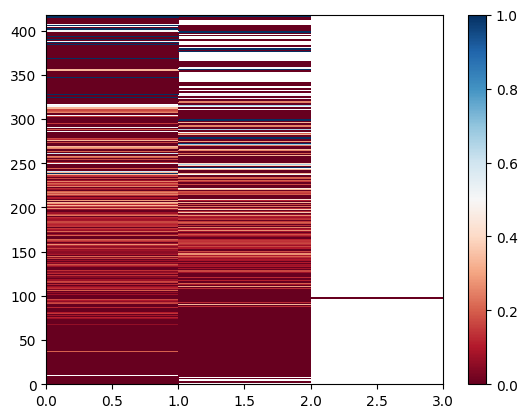

In [34]:
#Apresente graficamente a "pivot table" da alínea anterior no formato de um "heatmap"
plt.pcolor(grouped_pivot, cmap='RdBu')  
plt.colorbar()  
# plt.show() 

In [35]:
#Apresente a média da variável de escala anterior para cada grupo de uma das variáveis categóricas anteriores
df_groups = df[['bmi','hypertension']]  
grouped_by_mean = df_groups.groupby(['bmi'],as_index=False).mean()  
print(grouped_by_mean)

      bmi  hypertension
0    10.3           0.0
1    11.3           0.0
2    11.5           0.0
3    12.0           0.0
4    12.3           0.0
..    ...           ...
413  66.8           0.0
414  71.9           0.0
415  78.0           1.0
416  92.0           1.0
417  97.6           1.0

[418 rows x 2 columns]


In [36]:
#Realize o teste one-way ANOVA para os grupos de uma das variáveis categóricas anteriores, considerando a variável de escala anterior como variável dependente
df_groups = df[['gender', 'bmi', 'hypertension']].dropna(subset=['gender', 'bmi'])
grouped = df_groups.groupby('gender')
f_val, p_val = stats.f_oneway(grouped.get_group('Male')['bmi'], grouped.get_group('Female')['bmi'])
print("ANOVA results: F = ",f_val,", P = ", p_val)

ANOVA results: F =  3.36069373906378 , P =  0.0668304927237624


C:\Users\guigo\AppData\Local\Temp\ipykernel_5944\3934568086.py:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(grouped.get_group('Male')['bmi'], grouped.get_group('Female')['bmi'])
